In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
df = pd.read_csv(r'cleaned_data.csv')
df.head()

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
0,2020-08-31,0.311845,0.310544,2.548054,0.203834,0.727693,2.136432,0.882281
1,2020-09-01,0.332974,0.306303,2.687319,0.203522,0.722940,2.094566,0.855546
2,2020-09-02,0.332368,0.315056,2.629334,0.204743,0.734758,2.125291,0.872526
3,2020-09-03,0.339772,0.310060,2.534974,0.201707,0.728923,2.210971,0.848504
4,2020-09-04,0.356920,0.300754,2.536138,0.199887,0.707646,2.152835,0.854765


In [3]:
df.tail(2)

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
495,2022-08-18,0.816374,0.333768,4.22249,0.204492,1.196920,3.371537,0.950678
496,2022-08-19,0.822204,0.334919,4.28095,0.204631,1.200391,3.405268,0.951858


In [4]:
df.describe()

,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,0.439148,0.296925,3.242148,0.178814,0.728099,2.664304,0.960830
std,0.134129,0.038166,0.309264,0.017806,0.170586,0.296301,0.047787
min,0.279760,0.219809,2.513787,0.147486,0.464028,2.094566,0.829956
25%,0.336085,0.270483,3.054503,0.164950,0.624090,2.436779,0.928549
50%,0.403014,0.290112,3.224409,0.175372,0.691772,2.649792,0.960627
75%,0.464571,0.316606,3.435012,0.189553,0.742545,2.861494,0.994654
max,0.822204,0.425462,4.280950,0.231046,1.230987,3.405268,1.094158


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      497 non-null    object 
 1   ALB_ZBRA  497 non-null    float64
 2   NRG_CPRT  497 non-null    float64
 3   DE_BXP    497 non-null    float64
 4   NRG_STE   497 non-null    float64
 5   NRG_XRAY  497 non-null    float64
 6   SO_NLOK   497 non-null    float64
 7   PEG_O     497 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.2+ KB


In [6]:
# we check first chosen ratios first (here: ALB_ZBRA)
df_small=df.iloc[:,[0,2]]
df_small.head()

,Date,NRG_CPRT
0,2020-08-31,0.310544
1,2020-09-01,0.306303
2,2020-09-02,0.315056
3,2020-09-03,0.310060
4,2020-09-04,0.300754


In [7]:
df_small.shape

(497, 2)

In [8]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      497 non-null    object 
 1   NRG_CPRT  497 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


## Splitting Data in Train and Validation

In [9]:
length_data = len(df_small)    
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length:", length_train)
print("Validation data lenth:", length_validation)

Data length : 497
Train data length: 348
Validation data lenth: 149


In [10]:
# train_data
train_data = df_small[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,NRG_CPRT
0,2020-08-31,0.310544
1,2020-09-01,0.306303
2,2020-09-02,0.315056
3,2020-09-03,0.310060
4,2020-09-04,0.300754
...,...,...
343,2022-01-10,0.288623
344,2022-01-11,0.288111
345,2022-01-12,0.285775
346,2022-01-13,0.287149


In [11]:
# validation_data
validation_data = df_small[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,NRG_CPRT
348,2022-01-18,0.294584
349,2022-01-19,0.294031
350,2022-01-20,0.291894
351,2022-01-21,0.300901
352,2022-01-24,0.299289
...,...,...
492,2022-08-15,0.321488
493,2022-08-16,0.323634
494,2022-08-17,0.327442
495,2022-08-18,0.333768


## Creating Train Dataset from Train split

In [48]:
dataset_train = train_data.iloc[:, 1].values
dataset_train.shape

(348,)

In [15]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(348, 1)

## Normalization / Feature Scaling not needed/recommended

In [16]:
dataset_train_scaled = dataset_train

## Creating X_train and y_train from Train data 

We have train data composed of ratios over days

So, it has 1184 ratios corresponding 1184 days

My aim is to predict the ratio (closing) of the next day.

I can use a time step of 2 days.

I will pick first 2 ratios (day 0 to 2), 1st 2 ratio will be in 
X_train data

Then predict the ratio of 3rd day; and 3rd ratio will be in y_train data

Again, i will pick ratios from 1 to 3, those will be in X_train data

Then predict the next days ratio, 4th ratio will be in y_train data



In [17]:
X_train = []
y_train = []

time_step = 20 #change that?

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0:1])
    y_train.append(dataset_train_scaled[i,0:1])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train.shape

(328, 20, 1)

In [19]:
pd.Series([len(X) for X in X_train]).describe()

count    328.0
mean      20.0
std        0.0
min       20.0
25%       20.0
50%       20.0
75%       20.0
max       20.0
dtype: float64

In [20]:
dataset_train_scaled[i-time_step:i]

array([[0.26508372],
       [0.27519382],
       [0.27627761],
       [0.28138821],
       [0.28144874],
       [0.28081205],
       [0.27710928],
       [0.27723546],
       [0.27658635],
       [0.27627573],
       [0.27638242],
       [0.2843714 ],
       [0.28372329],
       [0.28471749],
       [0.2794151 ],
       [0.28922975],
       [0.28862324],
       [0.28811112],
       [0.28577502],
       [0.28714945]])

In [21]:
dataset_train_scaled[i,0]

0.2909430759355481

In [22]:
print("Shape of X_train before reshape:",X_train.shape)
print("Shape of y_train before reshape:",y_train.shape)

Shape of X_train before reshape: (328, 20, 1)
Shape of y_train before reshape: (328, 1)


In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (328, 20, 1)
Shape of y_train after reshape : (328, 1)


In [24]:
X_train[0]

array([[0.3105442 ],
       [0.30630302],
       [0.31505606],
       [0.31006008],
       [0.30075381],
       [0.29340291],
       [0.29283691],
       [0.28700457],
       [0.28893813],
       [0.28316302],
       [0.2715342 ],
       [0.2739306 ],
       [0.27850235],
       [0.269227  ],
       [0.26484232],
       [0.25596527],
       [0.25990351],
       [0.26535508],
       [0.26401085],
       [0.25928571]])

In [25]:
X_train = X_train[:int(X_train.shape[0]*0.95)]
X_val = X_train[int(X_train.shape[0]*0.95):]
y_train = y_train[:int(y_train.shape[0]*0.95)]
y_val = y_train[int(y_train.shape[0]*0.95):]

Check the first item in y_train
It is the ratio of 2nd day (timestep 2)

In [26]:
y_train[0]

array([0.26190287])

## Creating Test Dataset from Validation Data

In [52]:
#Converting array and scaling
dataset_validation = validation_data.iloc[:,1].values  # getting "Ratio" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
#scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling  values to between 0 and 1
scaled_dataset_validation = dataset_validation 

print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (149, 1)


In [29]:
#Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [30]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [31]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (129, 20)
Shape of y_test before reshape : (129,)


In [32]:
#reshape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [33]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (129, 20, 1)
Shape of y_test after reshape : (129, 1)


## Creating LSTM Model

In [35]:
y_train.min()

0.2198087205959466

In [36]:
X_train.shape

(311, 20, 1)

In [37]:
y_train.shape

(311, 1)

In [53]:
from keras.layers import LSTM
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense


es = EarlyStopping(patience=20, restore_best_weights=True)
model_lstm = Sequential()

model_lstm.add(LSTM(20,return_sequences=False,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

model_lstm.compile(loss = "mape", optimizer = "rmsprop", metrics = ["mae", "mape"])
history2 = model_lstm.fit(X_train, y_train, epochs = 400, batch_size = 64,validation_data = (X_val, y_val),callbacks=[es])

Epoch 1/400
5/5 [==============================] - 1s 81ms/step - loss: 78.3418 - mae: 0.2209 - mape: 78.3418 - val_loss: 5.1821 - val_mae: 0.0130 - val_mape: 5.1821
Epoch 2/400
5/5 [==============================] - 0s 6ms/step - loss: 8.2864 - mae: 0.0235 - mape: 8.2864 - val_loss: 3.0741 - val_mae: 0.0081 - val_mape: 3.0741
Epoch 3/400
5/5 [==============================] - 0s 6ms/step - loss: 7.6900 - mae: 0.0226 - mape: 7.6900 - val_loss: 10.7224 - val_mae: 0.0271 - val_mape: 10.7224
Epoch 4/400
5/5 [==============================] - 0s 6ms/step - loss: 8.5562 - mae: 0.0238 - mape: 8.5562 - val_loss: 3.0266 - val_mae: 0.0080 - val_mape: 3.0266
Epoch 5/400
5/5 [==============================] - 0s 6ms/step - loss: 6.1492 - mae: 0.0182 - mape: 6.1492 - val_loss: 3.0154 - val_mae: 0.0079 - val_mape: 3.0154
Epoch 6/400
5/5 [==============================] - 0s 6ms/step - loss: 6.9025 - mae: 0.0202 - mape: 6.9025 - val_loss: 9.0957 - val_mae: 0.0230 - val_mape: 9.0957
Epoch 7/400
5/5 [

## Evaluating LSTM Model

In [40]:
model_lstm.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 6.6121 - mae: 0.0235 - mape: 6.6121


[6.612114429473877, 0.023512855172157288, 6.612114429473877]

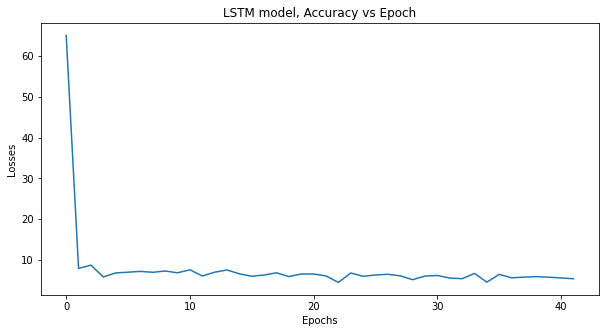

In [41]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

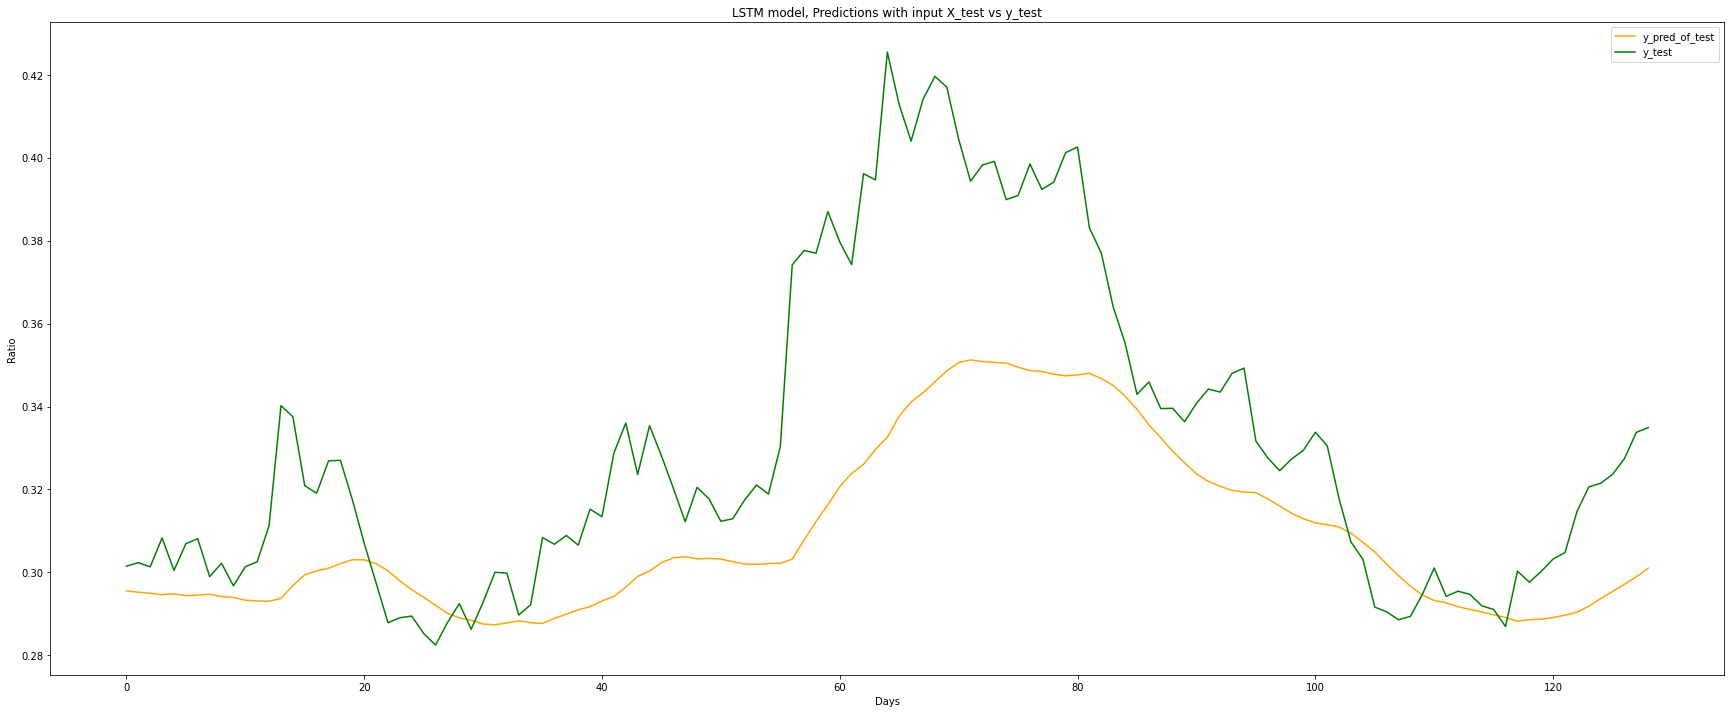

In [42]:
plt.subplots(figsize =(30,12))
plt.plot(model_lstm.predict(X_test), label = "y_pred_of_test", c = "orange" )
plt.plot(y_test, label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

## Future ratio prediction

In [43]:
#last day in our data?
df.iloc[-1]

Date        2022-08-19
ALB_ZBRA      0.822204
NRG_CPRT      0.334919
DE_BXP         4.28095
NRG_STE       0.204631
NRG_XRAY      1.200391
SO_NLOK       3.405268
PEG_O         0.951858
Name: 496, dtype: object

### We can predict the ratio for the day after 2022-08-23--> for 2022-08-24.
We will use last ratios as input of our model for this prediction.

In [44]:
X_input = df.iloc[-time_step:].ALB_ZBRA.values             # getting last rows and converting to array
X_input = (X_input.reshape(-1,1))     # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,time_step,1))                    # reshaping: converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 20, 1)


array([[[0.69941916],
        [0.68844238],
        [0.69216225],
        [0.6859797 ],
        [0.6830216 ],
        [0.66947524],
        [0.75433006],
        [0.73386229],
        [0.71053908],
        [0.71748567],
        [0.74122061],
        [0.76420431],
        [0.78845742],
        [0.79077385],
        [0.81204942],
        [0.81302763],
        [0.8141544 ],
        [0.8154501 ],
        [0.81637364],
        [0.82220391]]])

In [45]:
LSTM_prediction = model_lstm.predict(X_input)
print("LSTM, prediction for 2022-08-24:", LSTM_prediction[0,0])

LSTM, prediction for 2022-08-24: 0.563123
